In [34]:
from sklearn.datasets import fetch_california_housing
import pygam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pygam import LinearGAM, s, f
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split

In [39]:
data = fetch_california_housing()
 
data = fetch_california_housing()
print(data.feature_names)
 
X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [49]:
gam = LinearGAM(s(0)+s(1)+s(4)+s(6)+s(7)).fit(X_train, y_train)

In [50]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      70.408
Link Function:                     IdentityLink Log Likelihood:                                -15203.4285
Number of Samples:                        12384 AIC:                                            30549.6729
                                                AICc:                                           30550.5129
                                                GCV:                                                0.4452
                                                Scale:                                              0.4407
                                                Pseudo R-Squared:                                    0.671
Feature Function                  Lam

/var/folders/zm/t5q0r2zn06j6v7256cjw7_j80000gn/T/ipykernel_33892/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


<Figure size 2800x800 with 0 Axes>

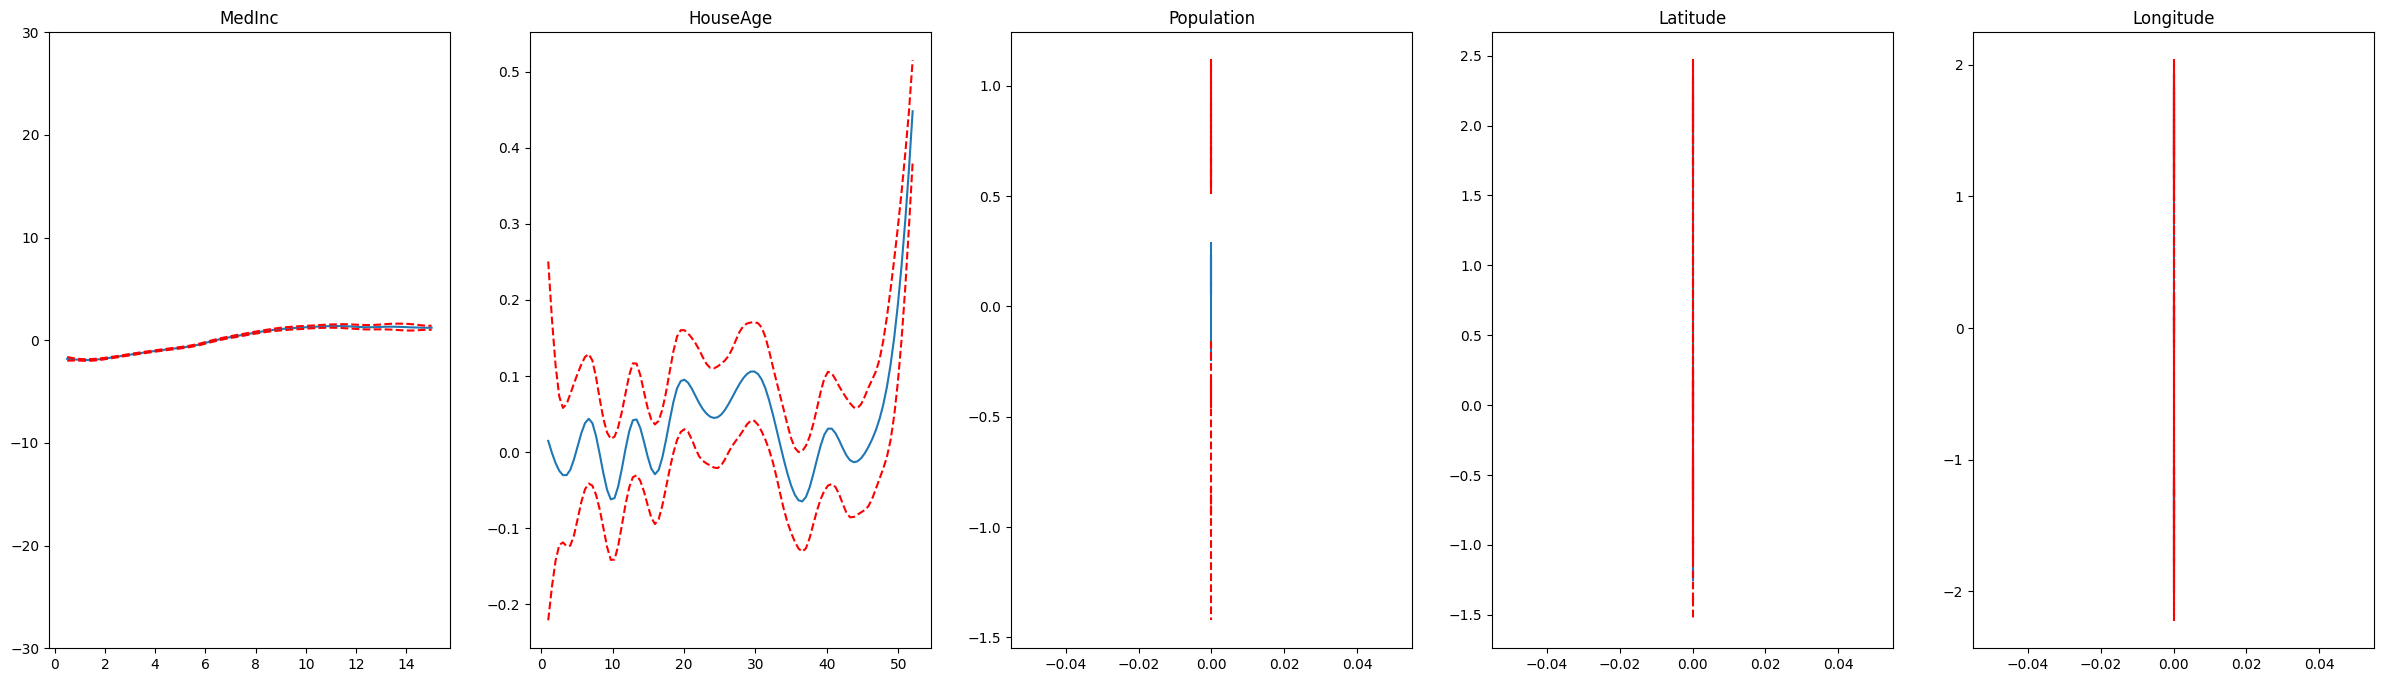

In [63]:
titles = ['MedInc', 'HouseAge', 'Population', 'Latitude', 'Longitude']
plt.figure()
fig, axs = plt.subplots(1,5,figsize=(30, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [64]:
y_pred = gam.predict(X_test)

In [70]:
y_test.shape

torch.Size([8256, 1])

In [71]:
y_test.reshape([8256])

tensor([0.8500, 2.9940, 1.2650,  ..., 4.1260, 2.6350, 1.9760])

In [65]:
crit=nn.MSELoss()
loss=crit(torch.tensor(y_pred),y_test).item()

/opt/homebrew/lib/python3.11/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8256, 1])) that is different to the input size (torch.Size([8256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [66]:
loss

2.2229225930165666

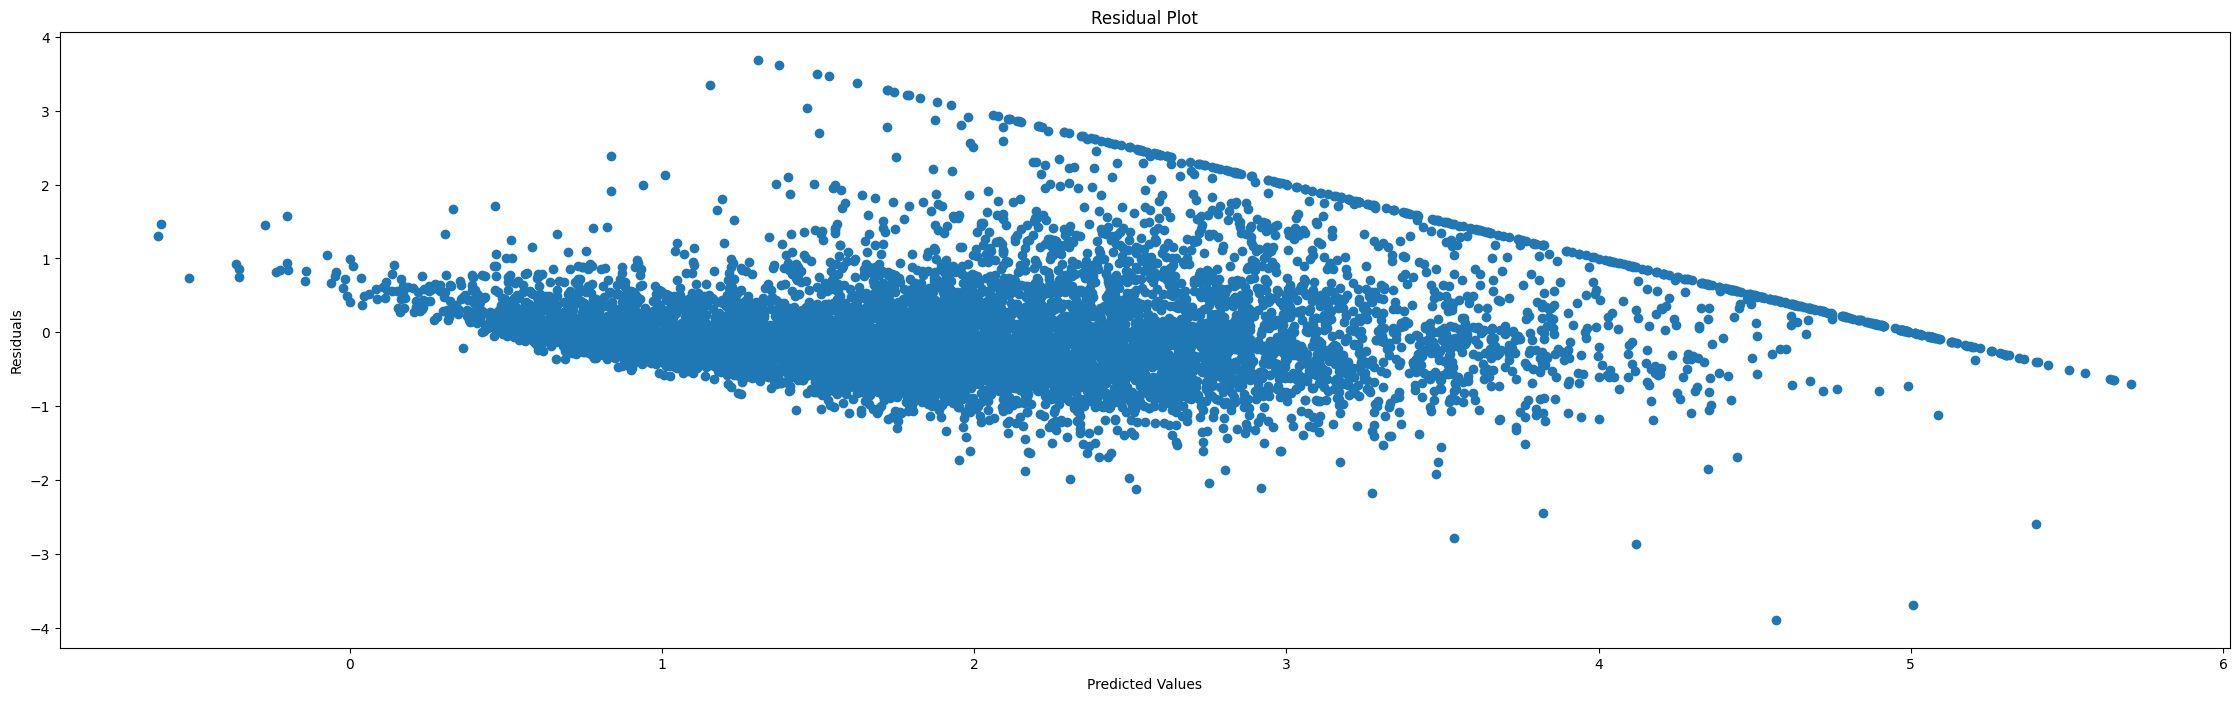

In [72]:
import matplotlib.pyplot as plt
y_test=y_test.reshape([8256])
residuals = (y_test - y_pred)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


AttributeError: 'LinearGAM' object has no attribute 'feature_importances_'